<a href="https://colab.research.google.com/github/lakshmansamvith/Campus--Placements/blob/master/Campus_Placements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Uploading CSV file into Colab from Local Machine 

In [0]:
from google.colab import files 
uploaded = files.upload()

Saving Placement_Data_Full_Class.csv to Placement_Data_Full_Class.csv


#Reading Dataset into DataFrame

In [0]:
import pandas as pd 
import numpy as np
DataFrame = pd.read_csv('Placement_Data_Full_Class.csv')

#Filling in Null Values for ease of reference and finding no of placed students 

In [0]:
#Filling all the non_placed students salary with 0 
DataFrame['salary'] = DataFrame['salary'].fillna(0)

no_placed_students = len(DataFrame[DataFrame['salary']!=0])

non_placed_students = (len(DataFrame)-no_placed_students)


#Replacing Eligible Columns with Binary Values (Preprocessing Dataset)

In [0]:
DataFrame['workex'].replace(to_replace='Yes', value=1, inplace=True)
DataFrame['workex'].replace(to_replace='No', value=0, inplace=True)
DataFrame['status'].replace(to_replace='Placed', value=1, inplace=True)
DataFrame['status'].replace(to_replace='Not Placed', value=0, inplace=True)
DataFrame['gender'].replace(to_replace='M', value=0, inplace=True)
DataFrame['gender'].replace(to_replace='F', value=1, inplace=True)

DataFrame_copy = DataFrame

DataFrame_copy


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,0,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,0,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,0,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,5,0,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,212,0,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,213,0,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,214,1,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


#Preprocessing Categorical Data using Label Encoder 

In [0]:
from sklearn.preprocessing import LabelEncoder

categorical_data = [DataFrame['ssc_b'].values, DataFrame['hsc_b'].values, DataFrame['hsc_s'].values, 
                    DataFrame['degree_t'].values, DataFrame['specialisation'].values  ]
label_encoder = LabelEncoder() 

for num in range(len(categorical_data)):
    categorical_data[num] = label_encoder.fit_transform(categorical_data[num])

DataFrame['ssc_b'], DataFrame['hsc_b'], DataFrame['hsc_s'], DataFrame['degree_t'], DataFrame['specialisation']  = categorical_data 



#Correlation among Factors, Feature Selection 

In [0]:
correlation = DataFrame.corr()
salary_correlations = correlation['salary']   
count=0
print(salary_correlations)

required_attributes = list() 
for elem in salary_correlations: 
  if elem >0.40: 
    required_attributes.append(correlation.columns[count])
  count = count + 1  
print(required_attributes)
required_attributes, target_attributes = required_attributes[:4], required_attributes[4:]

print(required_attributes, target_attributes)



sl_no             0.002543
gender           -0.143110
ssc_p             0.538090
ssc_b             0.034594
hsc_p             0.452569
hsc_b             0.011544
hsc_s             0.058970
degree_p          0.408371
degree_t          0.053155
workex            0.298285
etest_p           0.186988
specialisation   -0.275766
mba_p             0.139823
status            0.865774
salary            1.000000
Name: salary, dtype: float64
['ssc_p', 'hsc_p', 'degree_p', 'status', 'salary']
['ssc_p', 'hsc_p', 'degree_p', 'status'] ['salary']


# Dividing into Input Data Set and Target Data Set

In [0]:
X = DataFrame[required_attributes]
y = DataFrame[target_attributes]
X = X.values
y = y.values.reshape(len(DataFrame),)
#print(y.shape)

(215,)


#Splitting available Data into Train and Test Dataset  

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = RobustScaler()
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_test.shape, X_test.shape, y_test.shape, y_train.shape) 

(54, 4) (54, 4) (54,) (161,)


#Training a Random Forest Regressor and Evaluating the Model 

In [0]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(max_depth=3).fit(X_train, y_train)
score = rf_regressor.score(X_test, y_test)
predicted_salaries = rf_regressor.predict(X_test)
#print(predicted_salaries)
print(score)



0.8448667080136216


#Plotting for Highest Correlated Factor

ssc_p


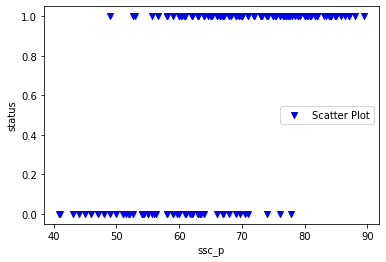

In [0]:
import matplotlib.pyplot as plt 

status_correlations = correlation['status']
status_correlations = status_correlations[:13] 
count = 0 
maxi = max(status_correlations)
variable = status_correlations[status_correlations == maxi].index[0]
print(variable)
plt.scatter(DataFrame[variable], DataFrame['status'], marker='v', color='b', label='Scatter Plot')
plt.xlabel('ssc_p')
plt.ylabel('status')
plt.legend()
plt.show()

